In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [90]:
df = pd.read_csv('train_ctrUa4K.csv')

In [91]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [92]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [93]:
df.shape

(614, 13)

In [94]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [95]:
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [96]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [97]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [98]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [99]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [100]:
## Fill Missing Values
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())


In [101]:
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])

In [102]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [103]:
import seaborn as sns

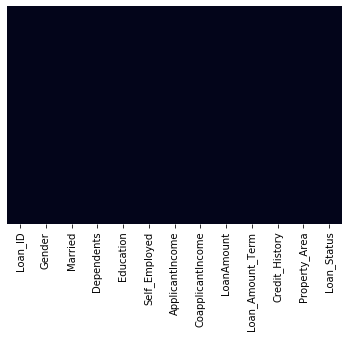

In [104]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [105]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [106]:
columns = ['Dependents','Property_Area','Credit_History','Education','Self_Employed','Married','Gender']

In [107]:
def category_onehot_multcols(multcolumns):
    df_final=final_df
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([final_df,df_final],axis=1)

    return df_final

In [108]:
main_df=df.copy()


In [109]:
test_df=pd.read_csv('formulatedtest.csv')

In [110]:
final_df=pd.concat([df,test_df],axis=0)

C:\Users\yash0\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [111]:
final_df=category_onehot_multcols(columns)

Dependents
Property_Area
Credit_History
Education
Self_Employed
Married
Gender


In [112]:
final_df

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_ID,Loan_Status,1,2,3+,Semiurban,Urban,1.0,Not Graduate,Yes,Yes,Male
0,5849,0.0,146.412162,360.0,LP001002,Y,0,0,0,0,1,1,0,0,0,1
1,4583,1508.0,128.000000,360.0,LP001003,N,1,0,0,0,0,1,0,0,1,1
2,3000,0.0,66.000000,360.0,LP001005,Y,0,0,0,0,1,1,0,1,1,1
3,2583,2358.0,120.000000,360.0,LP001006,Y,0,0,0,0,1,1,1,0,1,1
4,6000,0.0,141.000000,360.0,LP001008,Y,0,0,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,4009,1777.0,113.000000,360.0,LP002971,NaN,0,0,1,0,1,1,1,1,1,1
363,4158,709.0,115.000000,360.0,LP002975,NaN,0,0,0,0,1,1,0,0,1,1
364,3250,1993.0,126.000000,360.0,LP002980,NaN,0,0,0,1,0,1,0,0,0,1
365,5000,2393.0,158.000000,360.0,LP002986,NaN,0,0,0,0,0,1,0,0,1,1


In [113]:
final_df.shape

(981, 16)

In [114]:

final_df =final_df.loc[:,~final_df.columns.duplicated()]

In [115]:
final_df.shape

(981, 15)

In [116]:
final_df.drop(['Loan_ID'], axis=1,inplace=True)

C:\Users\yash0\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [117]:
final_df

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status,1,2,3+,Semiurban,Urban,1.0,Not Graduate,Yes,Male
0,5849,0.0,146.412162,360.0,Y,0,0,0,0,1,1,0,0,1
1,4583,1508.0,128.000000,360.0,N,1,0,0,0,0,1,0,0,1
2,3000,0.0,66.000000,360.0,Y,0,0,0,0,1,1,0,1,1
3,2583,2358.0,120.000000,360.0,Y,0,0,0,0,1,1,1,0,1
4,6000,0.0,141.000000,360.0,Y,0,0,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,4009,1777.0,113.000000,360.0,NaN,0,0,1,0,1,1,1,1,1
363,4158,709.0,115.000000,360.0,NaN,0,0,0,0,1,1,0,0,1
364,3250,1993.0,126.000000,360.0,NaN,0,0,0,1,0,1,0,0,1
365,5000,2393.0,158.000000,360.0,NaN,0,0,0,0,0,1,0,0,1


In [118]:

df_Train=final_df.iloc[:614,:]
df_Test=final_df.iloc[614:,:]

In [119]:

df_Train

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status,1,2,3+,Semiurban,Urban,1.0,Not Graduate,Yes,Male
0,5849,0.0,146.412162,360.0,Y,0,0,0,0,1,1,0,0,1
1,4583,1508.0,128.000000,360.0,N,1,0,0,0,0,1,0,0,1
2,3000,0.0,66.000000,360.0,Y,0,0,0,0,1,1,0,1,1
3,2583,2358.0,120.000000,360.0,Y,0,0,0,0,1,1,1,0,1
4,6000,0.0,141.000000,360.0,Y,0,0,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.000000,360.0,Y,0,0,0,0,0,1,0,0,0
610,4106,0.0,40.000000,180.0,Y,0,0,1,0,0,1,0,0,1
611,8072,240.0,253.000000,360.0,Y,1,0,0,0,1,1,0,0,1
612,7583,0.0,187.000000,360.0,Y,0,1,0,0,1,1,0,0,1


In [120]:
df_Test

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status,1,2,3+,Semiurban,Urban,1.0,Not Graduate,Yes,Male
0,5720,0.0,110.0,360.0,NaN,0,0,0,0,1,1,0,0,1
1,3076,1500.0,126.0,360.0,NaN,1,0,0,0,1,1,0,0,1
2,5000,1800.0,208.0,360.0,NaN,0,1,0,0,1,1,0,0,1
3,2340,2546.0,100.0,360.0,NaN,0,1,0,0,1,1,0,0,1
4,3276,0.0,78.0,360.0,NaN,0,0,0,0,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,4009,1777.0,113.0,360.0,NaN,0,0,1,0,1,1,1,1,1
363,4158,709.0,115.0,360.0,NaN,0,0,0,0,1,1,0,0,1
364,3250,1993.0,126.0,360.0,NaN,0,0,0,1,0,1,0,0,1
365,5000,2393.0,158.0,360.0,NaN,0,0,0,0,0,1,0,0,1


In [121]:
df_Test.drop(['Loan_Status'],axis=1,inplace=True)

In [122]:
x_train=df_Train.drop(['Loan_Status'],axis=1)
y_train=df_Train['Loan_Status']

In [123]:

from sklearn.ensemble import RandomForestClassifier

In [124]:

import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [125]:
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=10,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(x_train,y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   27.3s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  3.6min finished


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=Non

In [126]:
import pickle
filename = 'finalized_model.pkl'
pickle.dump(rf_randomcv, open(filename, 'wb'))

In [127]:
y_pred=rf_randomcv.predict(df_Test)

In [128]:
y_pred

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y

In [132]:
pred=pd.DataFrame(y_pred)
sub_df=pd.read_csv('sample_submission_49d68Cx.csv')
datasets=pd.concat([sub_df['Loan_ID'],pred],axis=1)
datasets.columns=['Loan_ID','Loan_Status']
datasets.to_csv('sample_submission_49d68Cx.csv',index=False)